<a href="https://colab.research.google.com/github/AakashAhuja30/Deep-Learning/blob/master/PipelineSupervisedLearning_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shallow Neural Networks for classification with no pretraining but non linear hidden units

## USING TENSORFLOW

In [1]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('default')

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


Creating the data

In [3]:
r=8
w1=np.zeros((21,21))
x1=np.array([np.arange(21)]).T
x2=np.array([np.arange(21)])
X1, X2=np.meshgrid(x1,x2)
R=(X1-10)**2+(X2-10)**2
x1c, x2c=np.where(np.all([[R<(r+.5)**2],[R>(r-.5)**2]], axis=0).squeeze())
w1[x1c, x2c]=1
# plt.figure()
# plt.imshow(w1)
# plt.close()
r=6
w2=np.zeros((21,21))
R=(X1-10)**2+(X2-10)**2
x1c, x2c=np.where(np.all([[R<(r+.5)**2],[R>(r-.5)**2]], axis=0).squeeze())
w2[x1c, x2c]=1
# plt.figure()
# plt.imshow(w2)
# plt.close()
r=8
w3=np.zeros((21,21))
w3[2*np.ones((1,17),dtype=np.int8), 2:19]=1
w3[18*np.ones((1,17),dtype=np.int8), 2:19]=1
w3[2:19 ,2*np.ones((1,17),dtype=np.int8)]=1
w3[2:19 ,18*np.ones((1,17),dtype=np.int8)]=1
# plt.imshow(w3)
r=6
w4=np.zeros((21,21))
w4[4*np.ones((1,13),dtype=np.int8), 4:17]=1
w4[16*np.ones((1,13),dtype=np.int8), 4:17]=1
w4[4:17, 4*np.ones((1,13),dtype=np.int8)]=1
w4[4:17, 16*np.ones((1,13),dtype=np.int8)]=1
# plt.imshow(w4)
w5=np.zeros((21,21))
w5[[8,8], [8,12]]=1;
# plt.imshow(w5)
w6=np.zeros((21,21))
w6[9:11, [10,10]]=1;
# plt.imshow(w6)
w7=np.zeros((21,21))
w7[[13,14,14,14,13], [8,9,10,11,12]]=1;
# plt.imshow(w7)
w8=np.zeros((21,21))
w8[[14,13,13,13,14], [8,9,10,11,12]]=1;
# plt.imshow(w7)
# plt.imshow(w1+w5+w6+w8)
# w1, w2, w3, w4
# w5, w6
# w7
# w8
X=np.zeros((8,21*21))
X[0,:]=(w1+w5+w6+w7).reshape((1,21*21))
X[1,:]=(w2+w5+w6+w7).reshape((1,21*21))
X[2,:]=(w3+w5+w6+w7).reshape((1,21*21))
X[3,:]=(w4+w5+w6+w7).reshape((1,21*21))
X[4,:]=(w1+w5+w6+w8).reshape((1,21*21))
X[5,:]=(w2+w5+w6+w8).reshape((1,21*21))
X[6,:]=(w3+w5+w6+w8).reshape((1,21*21))
X[7,:]=(w4+w5+w6+w8).reshape((1,21*21))
X=X.T

W=np.zeros((8,21*21))
W[0,:]=w1.reshape((1,21*21))
W[1,:]=w2.reshape((1,21*21))
W[2,:]=w3.reshape((1,21*21))
W[3,:]=w4.reshape((1,21*21))
W[4,:]=w5.reshape((1,21*21))
W[5,:]=w6.reshape((1,21*21))
W[6,:]=w7.reshape((1,21*21))
W[7,:]=w8.reshape((1,21*21))
W=W.T

In [11]:
x=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)
lr=tf.constant(0.0001)
lam=tf.constant(2.0)
We=tf.Variable((tf.random_uniform((8,21*21))-0.5)*0.001,dtype=tf.float32)
be=tf.Variable((tf.random_uniform((8,1))-0.5)*0.001,dtype=tf.float32)
W2=tf.Variable((tf.random_uniform((2,8))-0.5)*0.001,dtype=tf.float32)
b2=tf.Variable((tf.random_uniform((2,1))-0.5)*0.001,dtype=tf.float32)

Z=tf.nn.selu(We@X+be)
Yh=W2@Z+b2
loss=tf.reduce_sum(-Y*tf.log(tf.exp(Yh)/tf.reduce_sum(tf.exp(Yh),0,True)))
#loss=tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=Yh)

train_step=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

sess=tf.InteractiveSession()
tf.global_variables_initializer().run()
maxitr=1000
errt=np.zeros(maxitr)
for i in range(maxitr):
  errt[i],_=sess.run([loss,train_step],feed_dict={x:X,
                                                  Y:np.array(
                                                      [
                                                       [1,1,1,1,0,0,0,0], [0,0,0,0,1,1,1,1]
                                                       ]
                                                       )
                                                  }
                     )
  
  Wnp=We.eval()

W2np=W2.eval()
Yhnp=Yh.eval()
sess.close()  


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Text(0.5, 1.0, 'Prediction')

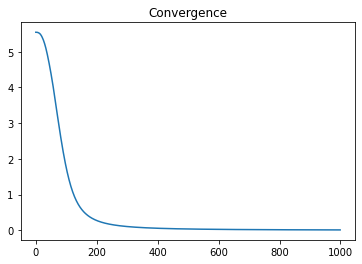

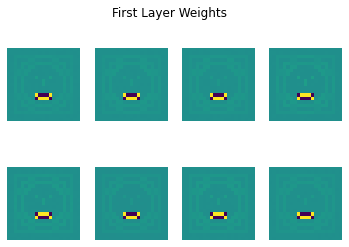

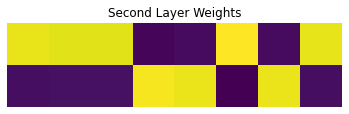

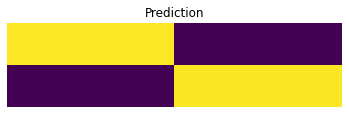

In [14]:
plt.figure()
plt.plot(errt)
plt.title('Convergence')

plt.figure()
plt.suptitle('First Layer Weights')    
for i in range(2):
  for j in range(4):
    ax=plt.subplot2grid((2, 4), (i, j))
    ax.imshow(Wnp[i*4+j,:].reshape((21,21)))
    plt.axis('off')


plt.figure()
plt.imshow(W2np)
plt.axis('off')
plt.title('Second Layer Weights')    

plt.figure()
plt.imshow(Yhnp)
plt.axis('off') 
plt.title('Prediction')    



## USING PYTORCH

In [9]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('default')

device=torch.device('cuda:0')

In [10]:
#Sparse coding: Adam, nonlinearity

#Define learning rate
lr=0.001

#Define all the variables needed
Y=torch.tensor([
  [1,1,1,1,0,0,0,0], [0,0,0,0,1,1,1,1]              
],
dtype=torch.float,
requires_grad=False,
device=device)

x=torch.tensor(X,dtype=torch.float,requires_grad=False, device=device)
We=torch.randn((8,21*21),dtype=torch.float,requires_grad=True, device=device)
be=torch.randn((8,1),dtype=torch.float,requires_grad=True, device=device)
W2=torch.randn((2,8),dtype=torch.float,requires_grad=True, device=device)
b2=torch.randn((2,1),dtype=torch.float,requires_grad=True, device=device)

We.data*=0.001
be.data*=0.001
W2.data*=0.001
b2.data*=0.001

#Defining the number of iterations and error matrix
maxitr=1000
errt=np.zeros(maxitr,dtype=np.float32)


#Defining non linearity and optimizer separately as these are essentials for pytorch syntax
selu=torch.nn.SELU()

optimizer=torch.optim.Adam([We,be,W2,b2],betas=(0.9,0.999), lr=lr)

#Run loop for max iterations
for i in range(maxitr):

  #Define prediction calculation

  Yh=W2@selu(We@x+be)+b2

  #Define error calculation for prediction
  err=torch.sum(-Y*torch.log(torch.exp(Yh)/torch.sum(torch.exp(Yh), dim=0, keepdim=True)))

  #Pytorch syntax(Detatch error)
  errt[i]=err.detach()
    
  #Start optimization syntax  
  optimizer.zero_grad()   
  err.backward()    
  optimizer.step()

    
print(torch.exp(Yh)/torch.sum(torch.exp(Yh), dim=0, keepdim=True))    
print(Y)    




tensor([[9.9904e-01, 9.9905e-01, 9.9905e-01, 9.9905e-01, 1.2426e-03, 1.2433e-03,
         1.2427e-03, 1.2434e-03],
        [9.5519e-04, 9.5454e-04, 9.5496e-04, 9.5429e-04, 9.9876e-01, 9.9876e-01,
         9.9876e-01, 9.9876e-01]], device='cuda:0', grad_fn=<DivBackward0>)
tensor([[1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1.]], device='cuda:0')


Text(0.5, 1.0, 'Convergence')

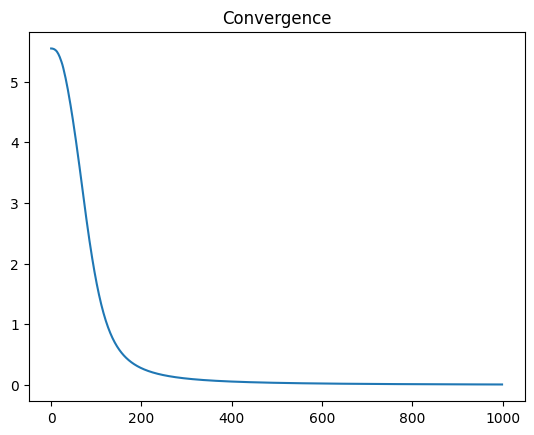

In [11]:
plt.figure()
plt.plot(errt)
plt.title('Convergence')



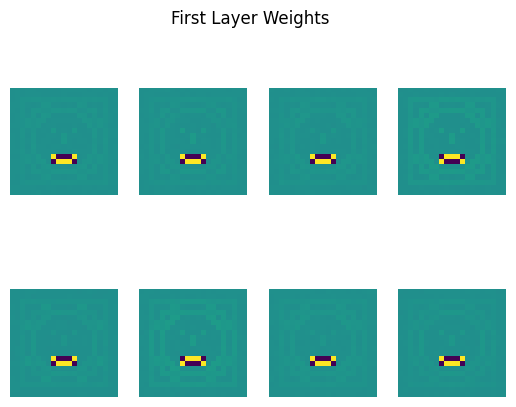

In [12]:
plt.figure()
plt.suptitle('First Layer Weights')    
for i in range(2):
  for j in range(4):
    ax=plt.subplot2grid((2, 4), (i, j))
    ax.imshow(We.detach().to("cpu")[i*4+j,:].resize_((21,21)))
    plt.axis('off')


